In [7]:
import requests
import json
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://fantasy.premierleague.com/api/bootstrap-static/2342/"

response = requests.get(url)

2342

In [ ]:
def get_data():
    """ Retrieve the fpl player data from the hard-coded url
    """
    response = requests.get("https://fantasy.premierleague.com/api/bootstrap-static/")
    if response.status_code != 200:
        raise Exception("Response was code " + str(response.status_code))
    responseStr = response.text
    data = json.loads(responseStr)
    return data

In [ ]:
def main():
    data = get_data()
    with open('.data/raw.json', 'w') as outf:
        json.dump(data, outf)
    return data

In [ ]:
data = get_data()

In [ ]:
data.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [ ]:
players = pd.json_normalize(data['elements']).set_index(['id'])
players.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
id,,,,,,,,,,,,,,,,,,,,,
1,100.0,50.0,80201,0,0,-5,5,0,1,0.5,...,557,59,404,29,NaN,,NaN,,NaN,
2,0.0,0.0,115918,0,0,0,0,0,1,0.0,...,451,18,508,52,NaN,,NaN,,NaN,
3,0.0,0.0,47431,0,0,-2,2,0,3,0.0,...,690,281,690,281,NaN,,NaN,,NaN,
4,100.0,0.0,54694,0,0,-4,4,0,4,0.5,...,20,9,61,16,NaN,,NaN,,1.0,
5,50.0,50.0,58822,0,0,-3,3,0,2,0.2,...,419,161,408,147,NaN,,NaN,,NaN,


In [ ]:
good_players = players.drop(players[players['minutes'] < 90].index)

for i, player in good_players.iterrows():
    print(player['web_name'])

Leno
Aubameyang
Cédric
Lacazette
Xhaka
Marí
Chambers
Kolasinac
Elneny
Maitland-Niles
Holding
Partey
Tierney
Pépé
Smith Rowe
Saka
Gabriel
Martinelli
White
Tavares
Sambi Lokonga
Ødegaard
Ramsdale
Tomiyasu
Steer
Martínez
Traoré
Sanson
McGinn
Hause
Mings
Targett
Watkins
Nakamba
Buendía
Cash
Konsa
Douglas Luiz
Ramsey
Young
Digne
Ings
Bailey
Chukwuemeka
Coutinho
Jansson
Nørgaard
Toney
Raya
Canós
Henry
Janelt
Ghoddos
Jensen
Goode
Forss
Roerslev
Sørensen
Pinnock
Mbeumo
Onyeka
Ajer
Thompson
Baptiste
Wissa
Fernández
Zanka
Lössl
Lallana
Steele
Groß
Duffy
Burn
Dunk
March
Webster
Veltman
Maupay
Trossard
Sánchez
Bissouma
Lamptey
Connolly
Alzate
Mac Allister
Moder
Welbeck
Mwepu
Cucurella
Tarkowski
Pieters
Cork
Rodriguez
Barnes
Mee
Westwood
Gudmundsson
Lowton
Vydra
Pope
Taylor
Brownhill
McNeil
Collins
Hennessey
Lennon
Cornet
Roberts
Azpilicueta
Thiago Silva
Alonso
Jorginho
Barkley
Kovacic
Rüdiger
Arrizabalaga
Kanté
Ziyech
Loftus-Cheek
Christensen
Werner
Chilwell
Pulisic
Mount
Hudson-Odoi
Havertz
James

In [ ]:
good_players.groupby(['element_type']).mean()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,event_points,in_dreamteam,...,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,direct_freekicks_order,penalties_order
element_type,,,,,,,,,,,,,,,,,,,,,
1,83.333333,78.260870,107040.710526,-0.026316,0.026316,-0.500000,0.500000,0.605263,2.184211,0.026316,...,19.500000,534.263158,45.263158,579.026316,55.842105,308.315789,19.500000,NaN,NaN,NaN
2,81.702899,72.445255,164324.041916,0.029940,-0.029940,-0.928144,0.928144,0.532934,1.934132,0.023952,...,84.107784,263.502994,84.964072,278.700599,87.610778,257.089820,84.227545,3.105263,2.916667,3.000000
3,87.812500,73.125000,174596.016304,-0.038043,0.038043,-1.418478,1.418478,0.548913,1.608696,0.027174,...,93.342391,159.929348,93.152174,180.255435,93.978261,193.250000,93.108696,2.776119,2.583333,2.702703
4,84.782609,80.555556,156480.461538,0.000000,0.000000,-1.192308,1.192308,0.769231,2.096154,0.019231,...,26.788462,183.730769,26.692308,91.730769,26.653846,153.346154,26.653846,2.000000,2.500000,2.200000


In [ ]:
def get_player_hist(i, url='https://fantasy.premierleague.com/api/element-summary/'):
    response = requests.get(url+str(i)+'/')
    if response.status_code != 200:
        raise Exception('Respone was code ' + str(response.status_code))
    return json.loads(response.text)

In [ ]:
pls = [4, 32, 281, 228, 61]
d = [get_player_hist(i) for i in good_players.index]


In [ ]:
d[0]['history']

[{'element': 1,
  'fixture': 1,
  'opponent_team': 3,
  'total_points': 1,
  'was_home': False,
  'kickoff_time': '2021-08-13T19:00:00Z',
  'team_h_score': 2,
  'team_a_score': 0,
  'round': 1,
  'minutes': 90,
  'goals_scored': 0,
  'assists': 0,
  'clean_sheets': 0,
  'goals_conceded': 2,
  'own_goals': 0,
  'penalties_saved': 0,
  'penalties_missed': 0,
  'yellow_cards': 0,
  'red_cards': 0,
  'saves': 1,
  'bonus': 0,
  'bps': 11,
  'influence': '11.8',
  'creativity': '0.0',
  'threat': '0.0',
  'ict_index': '1.2',
  'value': 50,
  'transfers_balance': 0,
  'selected': 153122,
  'transfers_in': 0,
  'transfers_out': 0},
 {'element': 1,
  'fixture': 18,
  'opponent_team': 6,
  'total_points': 2,
  'was_home': True,
  'kickoff_time': '2021-08-22T15:30:00Z',
  'team_h_score': 0,
  'team_a_score': 2,
  'round': 2,
  'minutes': 90,
  'goals_scored': 0,
  'assists': 0,
  'clean_sheets': 0,
  'goals_conceded': 2,
  'own_goals': 0,
  'penalties_saved': 0,
  'penalties_missed': 0,
  'yello

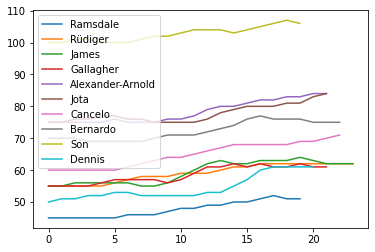

In [ ]:
value = []
label = []
fig, ax = plt.subplots()
for ind_id, player in enumerate(d):
    value = []
    for gw in player['history']:
        value.append(gw['value'])

    if (value[0] + 4) < value[-1]: 
        #Plotting only people who's value has increased by more than 0.5mill
        name = good_players['web_name'].loc[good_players.index[ind_id]]
        ax.plot(np.arange(0, len(value)), value, label=name)
ax.legend()
    #for season in player['history_past']:
    #    print(season['season_name'])
    #print('----')

In [ ]:
players.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'in_dreamteam', 'news',
       'news_added', 'now_cost', 'photo', 'points_per_game', 'second_name',
       'selected_by_percent', 'special', 'squad_number', 'status', 'team',
       'team_code', 'total_points', 'transfers_in', 'transfers_in_event',
       'transfers_out', 'transfers_out_event', 'value_form', 'value_season',
       'web_name', 'minutes', 'goals_scored', 'assists', 'clean_sheets',
       'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed',
       'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence',
       'creativity', 'threat', 'ict_index', 'influence_rank',
       'influence_rank_type', 'creativity_rank', 'creativity_rank_type',
       'threat_rank', 'thr

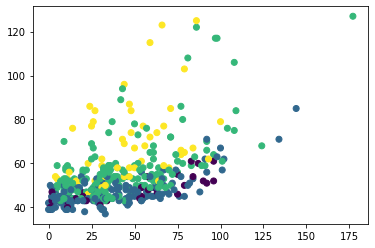

In [ ]:
fig, ax = plt.subplots()
ax.scatter(good_players['total_points'], good_players['now_cost'], c=good_players['element_type'])

Text(0.5, 1.0, 'FPL Value vs Points')

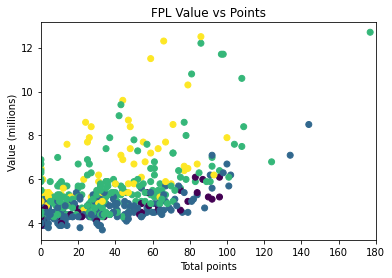

In [ ]:
fig, ax = plt.subplots()
ax.scatter(players['total_points'], players['now_cost']/10, c=players['element_type'])
ax.set_xlim([0, 180])
ax.set_ylabel('Value (millions)')
ax.set_xlabel('Total points')
ax.set_title('FPL Value vs Points')

In [ ]:
players['web_name'].loc[players['total_points'] > 100]

id
127             Rüdiger
138               Mount
144           Gallagher
233               Salah
237    Alexander-Arnold
240                Jota
256             Cancelo
259             Laporte
261            Bernardo
359                 Son
420               Bowen
Name: web_name, dtype: object

In [ ]:
# identifying the best value for money players
for player in data['elements']:
    if player['total_points']/player['now_cost'] > 1.7:
        print(player['web_name'])

Ramsdale
Cancelo
Laporte
de Gea
Bowen
Coady
Kilman
Sá


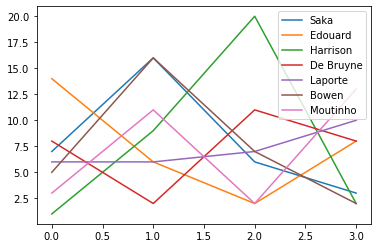

In [ ]:
# using gameweke data d

label = []
fig, ax = plt.subplots()
for ind_id, player in enumerate(d):
    points = []
    for gw in player['history']:
        points.append(gw['total_points'])

    if sum(points[-4:]) > 28: 
        #Plotting only people who's value has increased by more than 0.5mill
        name = good_players['web_name'].loc[good_players.index[ind_id]]
        ax.plot(np.arange(0, len(points[-4:])), points[-4:], label=name)
ax.legend()
    #for season in player['history_past']:
    #    print(season['season_name'])
    #print('----')

In [42]:
import json
players = json.load(open('.data/raw_unistats.json'))
players[0].keys()

dict_keys(['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA', 'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position', 'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup'])

In [43]:
players = pd.json_normalize(players).set_index(['id'])
players.head()

,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
id,,,,,,,,,,,,,,,,,
1250,Mohamed Salah,20,1786,16,15.608175069093704,9,6.22314802929759,80,40,1,0,F,Liverpool,14,13.324668571352959,22.21259716153145,7.717494197189808
6854,Diogo Jota,21,1577,10,12.519980128854513,1,3.8385497368872166,59,25,1,0,F S,Liverpool,10,12.519980128854513,19.360652767121792,5.775763585232198
755,Jamie Vardy,16,1325,9,6.063936270773411,1,1.183594960719347,36,14,2,0,F S,Leicester,9,6.063936270773411,7.677956260740757,1.25945988856256
453,Son Heung-Min,17,1499,8,6.958429858088493,3,3.3822450675070286,44,33,0,0,F M,Tottenham,8,6.958429858088493,11.58835968375206,3.5982557721436024
531,Michail Antonio,22,1932,8,9.544685870409012,6,4.611624114215374,57,36,4,1,F S,West Ham,8,8.783516973257065,16.199459329247475,6.068427070975304


In [57]:
players_new = pd.DataFrame()
for player in players['player_name']:
    name = player.split()
    if len(name) < 1:
        web_name = name
        first_name = None
        second_name = None
    else:
        first_name = name[0]
        second_name = name[1:]
        web_name = None
    player_new = pd.Series([first_name, second_name, web_name])
    pd.concat([players_new, player_new], axis=1)

players_new.head()

""


In [ ]:
for player in data['elements']:
    if player['in_dreamteam'] is True:
        print(player['first_name'] + ' ' + player['second_name'])

Antonio Rüdiger
Mohamed Salah
Trent Alexander-Arnold
Diogo Jota
João Pedro Cavaco Cancelo
Aymeric Laporte
Bernardo Mota Veiga de Carvalho e Silva
Heung-Min Son
Michail Antonio
Jarrod Bowen
José Malheiro de Sá


In [ ]:
import pandas as pd
data_2 = data['elements']
players = pd.json_normalize(data_2)
players[['web_name', 'form', 'total_points', 'minutes']].sort_values(by=['form'], ascending=False).head(10)

,web_name,form,total_points,minutes
640,Bowen,8.8,124,1948
657,Moutinho,8.7,68,1749
243,Edouard,7.5,77,1156
399,Laporte,7.2,101,1632
391,De Bruyne,7.2,86,1092
284,Schmeichel,6.7,63,1800
468,Saint-Maximin,6.3,84,1796
523,Ward-Prowse,6.0,85,1775
15,Tierney,6.0,82,1286
363,Fabinho,5.8,56,1341


In [ ]:
ppm = 90 * players['total_points'] / players['minutes']

In [ ]:
players = pd.concat([players, ppm], axis=1)
players.head()
players[['web_name', 'form', 'total_points', 'minutes', 0]].sort_values(by=[0], ascending=False).head(40)

,web_name,form,total_points,minutes,0
271,Kean,0.0,1,1,90.000000
651,Kral,0.2,1,1,90.000000
683,Cundle,0.3,1,1,90.000000
58,Wesley,0.0,1,1,90.000000
377,N.Williams,0.0,4,7,51.428571
315,McAteer,0.0,1,2,45.000000
366,Origi,0.0,14,38,33.157895
653,Perkins,0.2,1,3,30.000000
346,McKinstry,0.0,1,3,30.000000
417,McAtee,0.0,1,3,30.000000


In [ ]:
players.columns

Index([        'chance_of_playing_next_round',
               'chance_of_playing_this_round',
                                       'code',
                          'cost_change_event',
                     'cost_change_event_fall',
                          'cost_change_start',
                     'cost_change_start_fall',
                            'dreamteam_count',
                               'element_type',
                                    'ep_next',
                                    'ep_this',
                               'event_points',
                                 'first_name',
                                       'form',
                                         'id',
                               'in_dreamteam',
                                       'news',
                                 'news_added',
                                   'now_cost',
                                      'photo',
                            'points_per_game',
             